In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime, timedelta
import math


                ts_now         ts_simulator                           node  \
0  2021-12-15 22:13:56  2020-06-01 11:50:00  ip-172-20-45-201.ec2.internal   
1  2021-12-15 22:13:56  2020-06-01 11:50:00   ip-172-20-49-41.ec2.internal   
2  2021-12-15 22:13:56  2020-06-01 11:50:00  ip-172-20-58-134.ec2.internal   
3  2021-12-15 22:13:56  2020-06-01 11:50:00  ip-172-20-61-178.ec2.internal   
4  2021-12-15 22:14:02  2020-06-01 12:00:00  ip-172-20-45-201.ec2.internal   

   consumption  production  
0          158         0.0  
1          102      6043.0  
2          124      9190.7  
3          158       881.0  
4          158         0.0  
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
21
100.0 90.67198738080536 100.0 0.0


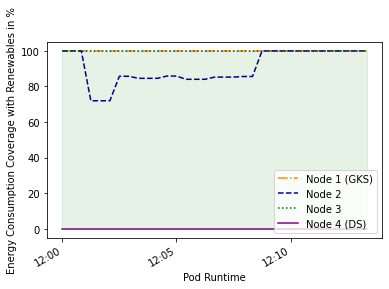

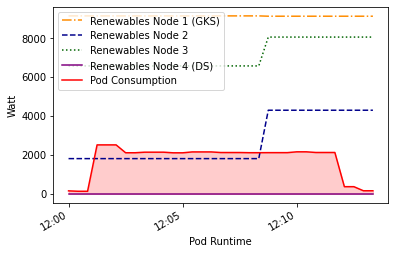

In [40]:
# 5.3.1

# a 
interval_simulator = 120
interval_monitor = 5
ts_resample = 600 / (interval_simulator / interval_monitor)

df = pd.read_csv('5.3.1a/monitor.log', delimiter = ";").fillna(0)

#print(df.head(30))

is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'
print(df.head())


gks = df[is_134]
gks = gks.iloc[1: , :]
y3 = gks['production'].values
y4 = df[is_178].iloc[1: , :]['production'].values
y5 = df[is_41].iloc[1: , :]['production'].values

placed = df[is_201]
placed = placed.iloc[1: , :]
placed = placed.reset_index(drop=True)



print(np.arange(len(placed)))
print(len(placed[placed['ts_simulator'] == '2020-06-01 12:00:00']))
#placed['ts_now'] = pd.to_datetime(placed['ts_now'], format="%Y-%m-%d %H:%M:%S")
placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")

placed['ts_resample'] = pd.to_datetime("2020-06-01 12:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')



x = placed['ts_resample'].values
y1 = placed['production'].values
y2 = placed['consumption'].values

coverage_gks = y3 / y2 *100
coverage_ds = y1 / y2 *100
coverage_n2 = y4 / y2 *100
coverage_n3 = y5 / y2 *100

coverage_gks[coverage_gks > 100] = 100 
coverage_ds[coverage_ds > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100 

avg_n1 = np.mean(coverage_gks)
avg_n2 = np.mean(coverage_n2)
avg_n3 = np.mean(coverage_n3)
avg_n4 = np.mean(coverage_ds)

print(avg_n1, avg_n2, avg_n3, avg_n4)


fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, coverage_gks, color='darkorange', label="Node 1 (GKS)", linestyle='-.')
plt.plot(x, coverage_n2, color='darkblue', label="Node 2", linestyle='--')
plt.plot(x, coverage_n3, color='darkgreen', label="Node 3", linestyle=':')
plt.plot(x, coverage_ds, color='purple', label="Node 4 (DS)")
plt.xlabel("Pod Runtime")
plt.ylabel("Energy Consumption Coverage with Renewables in %")
plt.legend(loc='lower right')
plt.fill_between(x, coverage_gks, coverage_ds, color='green', alpha=.1)
plt.show()


fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y3, color='darkorange', linestyle='-.', label="Renewables Node 1 (GKS)")
plt.plot(x, y4, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y5, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y1, color='purple', label="Renewables Node 4 (DS)")
plt.plot(x, y2, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, y1, y2, color='red', alpha=.2)
#plt.fill_between(x, y2, y3, color='green', alpha=.1)
plt.show()



                ts_now         ts_simulator                           node  \
0  2021-12-16 14:42:01  2020-06-01 18:00:00  ip-172-20-45-201.ec2.internal   
1  2021-12-16 14:42:01  2020-06-01 18:00:00   ip-172-20-49-41.ec2.internal   
2  2021-12-16 14:42:01  2020-06-01 18:00:00  ip-172-20-58-134.ec2.internal   
3  2021-12-16 14:42:01  2020-06-01 18:00:00  ip-172-20-61-178.ec2.internal   
4  2021-12-16 14:42:07  2020-06-01 18:00:00  ip-172-20-45-201.ec2.internal   

   consumption  production  
0          154         0.0  
1           93      2272.3  
2          151      1401.1  
3          170      2386.1  
4          145         0.0  
40.89016260866016 97.91215634994161 86.01029456055096 0.0


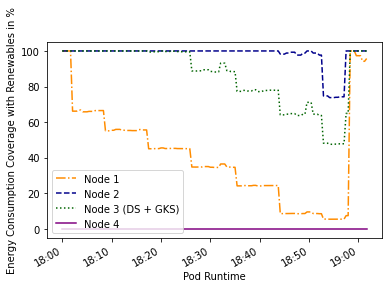

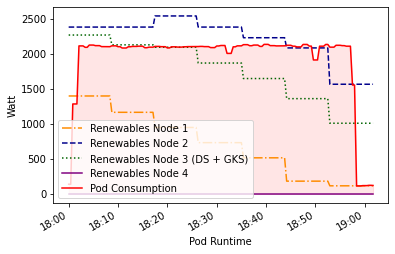

In [25]:
# 5.3.1

# b 
interval_simulator = 120
interval_monitor = 5
ts_resample = 600 / (interval_simulator / interval_monitor)

df = pd.read_csv('5.3.1b/monitor.log', delimiter = ";").fillna(0)

#print(df.head(30))

is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'
print(df.head())


y1 = df[is_134].iloc[1: , :]['production'].values
y2 = df[is_178].iloc[1: , :]['production'].values
y3 = df[is_41].iloc[1: , :]['production'].values
y4 = df[is_201].iloc[1: , :]['production'].values

placed = df[is_41].iloc[1: , :]
placed = placed.reset_index(drop=True)


placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")
placed['ts_resample'] = pd.to_datetime("2020-06-01 18:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')


x = placed['ts_resample'].values
con = placed['consumption'].values

coverage_n1 = y1 / con *100
coverage_n2 = y2 / con *100
coverage_n3 = y3 / con *100
coverage_n4 = y4 / con *100

coverage_n1[coverage_n1 > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100
coverage_n4[coverage_n4 > 100] = 100  

avg_n1 = np.mean(coverage_n1)
avg_n2 = np.mean(coverage_n2)
avg_n3 = np.mean(coverage_n3)
avg_n4 = np.mean(coverage_n4)

print(avg_n1, avg_n2, avg_n3, avg_n4)


fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, coverage_n1, color='darkorange', label="Node 1", linestyle='-.')
plt.plot(x, coverage_n2, color='darkblue', label="Node 2", linestyle='--')
plt.plot(x, coverage_n3, color='darkgreen', label="Node 3 (DS + GKS)", linestyle=':')
plt.plot(x, coverage_n4, color='purple', label="Node 4")
plt.xlabel("Pod Runtime")
plt.ylabel("Energy Consumption Coverage with Renewables in %")
plt.legend(loc='lower left')
#plt.fill_between(x, coverage_n2, coverage_n3, color='green', alpha=.1)
plt.show()


fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3 (DS + GKS)", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='lower left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.show()

                ts_now         ts_simulator                           node  \
0  2021-12-16 16:36:06  2020-10-14 06:00:00  ip-172-20-45-201.ec2.internal   
1  2021-12-16 16:36:06  2020-10-14 06:00:00   ip-172-20-49-41.ec2.internal   
2  2021-12-16 16:36:06  2020-10-14 06:00:00  ip-172-20-58-134.ec2.internal   
3  2021-12-16 16:36:06  2020-10-14 06:00:00  ip-172-20-61-178.ec2.internal   
4  2021-12-16 16:36:11  2020-10-14 06:00:00  ip-172-20-45-201.ec2.internal   

   consumption  production  
0          171         0.0  
1          134       568.6  
2          161        66.7  
3          194       881.0  
4          171         0.0  
35.16924488948099 23.917681286677986 33.677394959693814 0.0


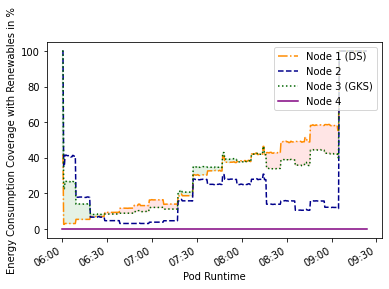

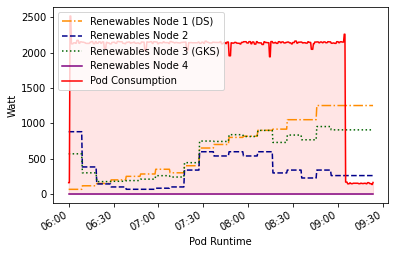

In [43]:
# 5.3.1

# c 
interval_simulator = 120
interval_monitor = 5.5
ts_resample = 600 / (interval_simulator / interval_monitor)

df = pd.read_csv('5.3.1c/monitor.log', delimiter = ";").fillna(0)

#print(df.head(30))

is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'
print(df.head())


y1 = df[is_134].iloc[1: , :]['production'].values
y2 = df[is_178].iloc[1: , :]['production'].values
y3 = df[is_41].iloc[1: , :]['production'].values
y4 = df[is_201].iloc[1: , :]['production'].values

placed = df[is_134].iloc[1: , :]
placed = placed.reset_index(drop=True)


placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")
placed['ts_resample'] = pd.to_datetime("2020-10-14 06:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')


x = placed['ts_resample'].values
con = placed['consumption'].values

coverage_n1 = y1 / con *100
coverage_n2 = y2 / con *100
coverage_n3 = y3 / con *100
coverage_n4 = y4 / con *100

coverage_n1[coverage_n1 > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100
coverage_n4[coverage_n4 > 100] = 100   

avg_n1 = np.mean(coverage_n1)
avg_n2 = np.mean(coverage_n2)
avg_n3 = np.mean(coverage_n3)
avg_n4 = np.mean(coverage_n4)

print(avg_n1, avg_n2, avg_n3, avg_n4)

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, coverage_n1, color='darkorange', label="Node 1 (DS)", linestyle='-.')
plt.plot(x, coverage_n2, color='darkblue', label="Node 2", linestyle='--')
plt.plot(x, coverage_n3, color='darkgreen', label="Node 3 (GKS)", linestyle=':')
plt.plot(x, coverage_n4, color='purple', label="Node 4")
plt.xlabel("Pod Runtime")
plt.ylabel("Energy Consumption Coverage with Renewables in %")
plt.fill_between(x, coverage_n3, coverage_n1, color='green', alpha=.1, where=coverage_n3>coverage_n1)
plt.fill_between(x, coverage_n3, coverage_n1, color='red', alpha=.1, where=coverage_n3<coverage_n1)
#plt.fill_between(x, coverage_n1, coverage_n3, color='red', alpha=.1)
plt.legend(loc='upper right')
plt.show()


fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1 (DS)")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3 (GKS)", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.show()

                ts_now         ts_simulator                           node  \
0  2021-12-17 13:54:04  2020-12-25 12:00:00  ip-172-20-45-201.ec2.internal   
1  2021-12-17 13:54:04  2020-12-25 12:00:00   ip-172-20-49-41.ec2.internal   
2  2021-12-17 13:54:04  2020-12-25 12:00:00  ip-172-20-58-134.ec2.internal   
3  2021-12-17 13:54:04  2020-12-25 12:00:00  ip-172-20-61-178.ec2.internal   
4  2021-12-17 13:54:09  2020-12-25 12:00:00  ip-172-20-45-201.ec2.internal   

   consumption  production  
0          157         0.0  
1          137       436.8  
2          154       467.0  
3          178       261.0  
4          157         0.0  
9.075381553560531 8.68177364824894 10.717001252063742 0.0


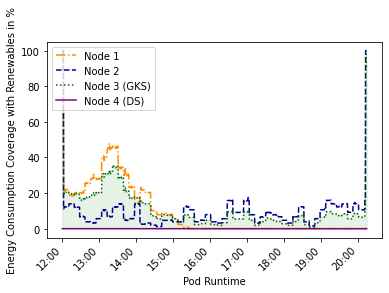

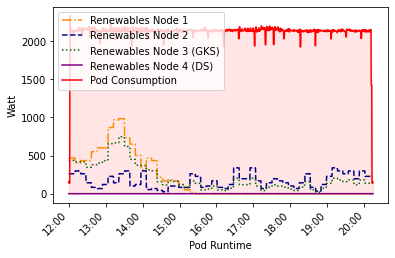

In [23]:
# 5.3.1
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np

# d 
interval_simulator = 120
interval_monitor = 5
ts_resample = 600 / (interval_simulator / interval_monitor)

df = pd.read_csv('5.3.1d/monitor.log', delimiter = ";").fillna(0)

#print(df.head(30))

is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'
print(df.head())


y1 = df[is_134].iloc[1: , :]['production'].values
y2 = df[is_178].iloc[1: , :]['production'].values
y3 = df[is_41].iloc[1: , :]['production'].values
y4 = df[is_201].iloc[1: , :]['production'].values

placed = df[is_201].iloc[1: , :]
placed = placed.reset_index(drop=True)


placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")
placed['ts_resample'] = pd.to_datetime("2020-12-25 12:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')


x = placed['ts_resample'].values
con = placed['consumption'].values

coverage_n1 = y1 / con *100
coverage_n2 = y2 / con *100
coverage_n3 = y3 / con *100
coverage_n4 = y4 / con *100

coverage_n1[coverage_n1 > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100
coverage_n4[coverage_n4 > 100] = 100

avg_n1 = np.mean(coverage_n1)
avg_n2 = np.mean(coverage_n2)
avg_n3 = np.mean(coverage_n3)
avg_n4 = np.mean(coverage_n4)

print(avg_n1, avg_n2, avg_n3, avg_n4)

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, coverage_n1, color='darkorange', label="Node 1", linestyle='-.')
plt.plot(x, coverage_n2, color='darkblue', label="Node 2", linestyle='--')
plt.plot(x, coverage_n3, color='darkgreen', label="Node 3 (GKS)", linestyle=':')
plt.plot(x, coverage_n4, color='purple', label="Node 4 (DS)")
plt.xlabel("Pod Runtime")
plt.ylabel("Energy Consumption Coverage with Renewables in %")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.fill_between(x, coverage_n3, coverage_n4, color='green', alpha=.1)
plt.show()

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3 (GKS)", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4 (DS)")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)

plt.show()

                ts_now         ts_simulator                           node  \
0  2021-12-17 22:01:04  2020-09-22 05:50:00  ip-172-20-45-201.ec2.internal   
1  2021-12-17 22:01:04  2020-09-22 05:50:00   ip-172-20-49-41.ec2.internal   
2  2021-12-17 22:01:04  2020-09-22 05:50:00  ip-172-20-58-134.ec2.internal   
3  2021-12-17 22:01:04  2020-09-22 05:50:00  ip-172-20-61-178.ec2.internal   
4  2021-12-17 22:01:10  2020-09-22 05:50:00  ip-172-20-45-201.ec2.internal   

   consumption  production  
0          158         0.0  
1          117       271.2  
2          129       450.4  
3          219         1.6  
4          158         0.0  
46.15611369132638 36.45128266659159 52.229381547849364 0.0


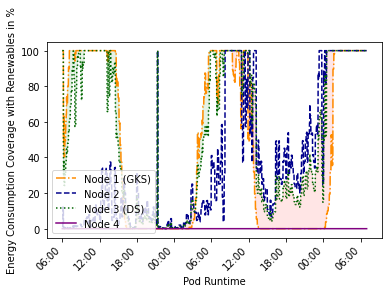

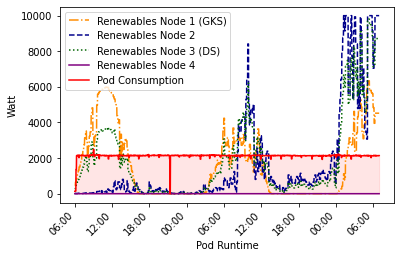

In [27]:
# 5.3.1
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# e 
interval_simulator = 30
interval_monitor = 5
ts_resample = 600 / (interval_simulator / interval_monitor)

df = pd.read_csv('5.3.1e/monitor.log', delimiter = ";").fillna(0)

#print(df.head(30))

is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'
print(df.head())


y1 = df[is_134].iloc[1: , :]['production'].values
y2 = df[is_178].iloc[1: , :]['production'].values
y3 = df[is_41].iloc[1: , :]['production'].values
y4 = df[is_201].iloc[1: , :]['production'].values

placed = df[is_134].iloc[1: , :]
placed = placed.reset_index(drop=True)


placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")
placed['ts_resample'] = pd.to_datetime("2020-09-22 06:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')


x = placed['ts_resample'].values
con = placed['consumption'].values

coverage_n1 = y1 / con *100
coverage_n2 = y2 / con *100
coverage_n3 = y3 / con *100
coverage_n4 = y4 / con *100

coverage_n1[coverage_n1 > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100
coverage_n4[coverage_n4 > 100] = 100

avg_n1 = np.mean(coverage_n1)
avg_n2 = np.mean(coverage_n2)
avg_n3 = np.mean(coverage_n3)
avg_n4 = np.mean(coverage_n4)

print(avg_n1, avg_n2, avg_n3, avg_n4)

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, coverage_n1, color='darkorange', label="Node 1 (GKS)", linestyle='-.')
plt.plot(x, coverage_n2, color='darkblue', label="Node 2", linestyle='--')
plt.plot(x, coverage_n3, color='darkgreen', label="Node 3 (DS)", linestyle=':')
plt.plot(x, coverage_n4, color='purple', label="Node 4")
plt.xlabel("Pod Runtime")
plt.ylabel("Energy Consumption Coverage with Renewables in %")
plt.xticks(rotation=45)
plt.legend(loc='lower left')
gks_poly = plt.fill_between(x, coverage_n1, coverage_n3, color='green', alpha=.1, where=coverage_n3<coverage_n1)
ds_poly = plt.fill_between(x, coverage_n1, coverage_n3, color='red', alpha=.1, where=coverage_n3>coverage_n1)
plt.show()

gks_sizes = gks_poly.get_sizes

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1 (GKS)")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3 (DS)", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)

plt.show()

                ts_now         ts_simulator                           node  \
0  2021-12-20 22:36:49  2020-08-01 12:00:00  ip-172-20-45-201.ec2.internal   
1  2021-12-20 22:36:49  2020-08-01 12:00:00   ip-172-20-49-41.ec2.internal   
2  2021-12-20 22:36:49  2020-08-01 12:00:00  ip-172-20-58-134.ec2.internal   
3  2021-12-20 22:36:49  2020-08-01 12:00:00  ip-172-20-61-178.ec2.internal   
4  2021-12-20 22:36:54  2020-08-01 12:00:00  ip-172-20-45-201.ec2.internal   

   consumption  production  
0          140         0.0  
1          113      5144.3  
2          130      8473.4  
3          167       100.4  
4          140         0.0  


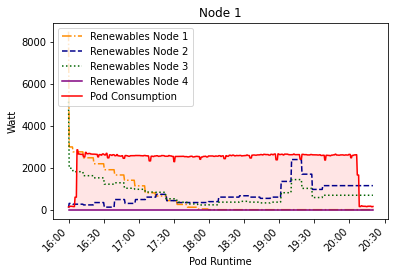

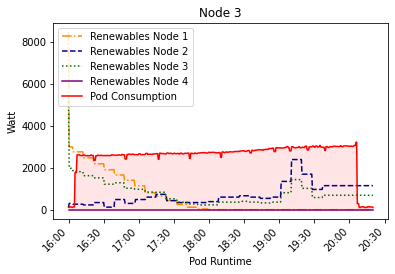

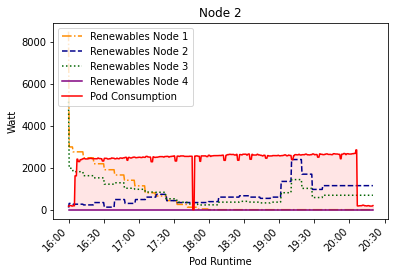

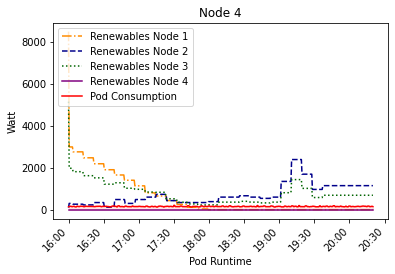

29.027790516253475


In [90]:
# 5.3.2
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


interval_simulator = 90
interval_monitor = 5
ts_resample = 600 / (interval_simulator / interval_monitor)

df = pd.read_csv('5.3.2c/monitor.log', delimiter = ";").fillna(0)

#print(df.head(30))

is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'
print(df.head())


y1 = df[is_134].iloc[1: , :]['production'].values
y2 = df[is_178].iloc[1: , :]['production'].values
y3 = df[is_41].iloc[1: , :]['production'].values
y4 = df[is_201].iloc[1: , :]['production'].values

placed = df[is_134].iloc[1: , :]
placed = placed.reset_index(drop=True)


placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")
placed['ts_resample'] = pd.to_datetime("2020-04-04 16:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')


x = placed['ts_resample'].values
con1 = placed['consumption'].values


fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con1, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con1, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 1")
plt.show()

placed = df[is_41].iloc[1: , :]
placed = placed.reset_index(drop=True)
con3 = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con3, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con3, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 3")
plt.show()

placed = df[is_178].iloc[1: , :]
placed = placed.reset_index(drop=True)
con2 = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con2, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con2, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 2")
plt.show()


placed = df[is_201].iloc[1: , :]
placed = placed.reset_index(drop=True)
con4 = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con4, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con4, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 4")
plt.show()


coverage_n1 = y1 / con1 *100
coverage_n2 = y2 / con2 *100
coverage_n3 = y3 / con3 *100
coverage_n4 = y4 / con4 *100

coverage_n1[coverage_n1 > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100
coverage_n4[coverage_n4 > 100] = 100

avg_n1 = np.mean(coverage_n1)
avg_n2 = np.mean(coverage_n2)
avg_n3 = np.mean(coverage_n3)
avg_n4 = np.mean(coverage_n4)

avgs = [avg_n1, avg_n2, avg_n3, avg_n4]

area1 = np.trapz(y=con1, x=placed.index.values)
area2 = np.trapz(y=con2, x=placed.index.values)
area3 = np.trapz(y=con3, x=placed.index.values)
area4 = np.trapz(y=con4, x=placed.index.values)

areas = [area1, area2, area3, area4]

weights = areas / sum(areas)

total_coverage = sum(avgs*weights)

print(total_coverage)


                ts_now         ts_simulator                           node  \
0  2021-12-19 16:36:11  2020-08-01 12:00:00  ip-172-20-45-201.ec2.internal   
1  2021-12-19 16:36:11  2020-08-01 12:00:00   ip-172-20-49-41.ec2.internal   
2  2021-12-19 16:36:11  2020-08-01 12:00:00  ip-172-20-58-134.ec2.internal   
3  2021-12-19 16:36:11  2020-08-01 12:00:00  ip-172-20-61-178.ec2.internal   
4  2021-12-19 16:36:18  2020-08-01 12:00:00  ip-172-20-45-201.ec2.internal   

   consumption  production  
0          175         0.0  
1          123      5144.3  
2          144      8473.4  
3          192       100.4  
4          175         0.0  


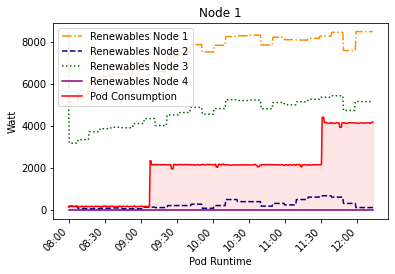

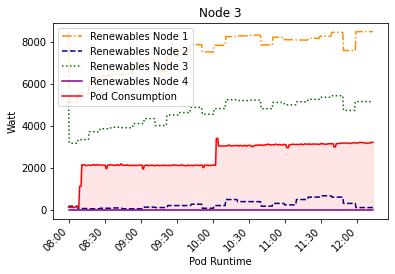

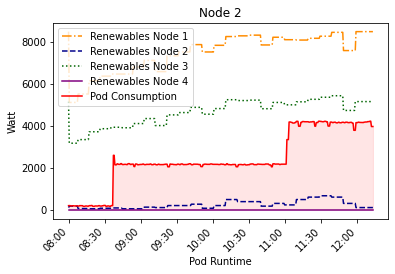

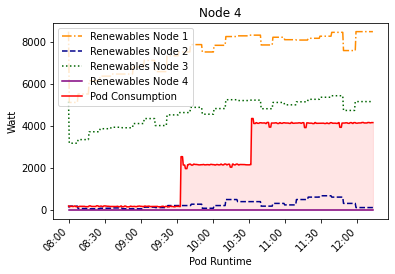

In [215]:
# 5.3.2
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# d 
interval_simulator = 90
interval_monitor = 5.5
ts_resample = 600 / (interval_simulator / interval_monitor)

df = pd.read_csv('5.3.2a/monitor_d.log', delimiter = ";").fillna(0)

#print(df.head(30))

is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'
print(df.head())


y1 = df[is_134].iloc[1: , :]['production'].values
y2 = df[is_178].iloc[1: , :]['production'].values
y3 = df[is_41].iloc[1: , :]['production'].values
y4 = df[is_201].iloc[1: , :]['production'].values

placed = df[is_134].iloc[1: , :]
placed = placed.reset_index(drop=True)


placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")
placed['ts_resample'] = pd.to_datetime("2020-08-01 08:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')


x = placed['ts_resample'].values
con = placed['consumption'].values

coverage_n1 = y1 / con *100
coverage_n2 = y2 / con *100
coverage_n3 = y3 / con *100
coverage_n4 = y4 / con *100

coverage_n1[coverage_n1 > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100
coverage_n4[coverage_n4 > 100] = 100    


fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 1")
plt.show()

placed = df[is_41].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 3")
plt.show()

placed = df[is_178].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 2")
plt.show()


placed = df[is_201].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 4")
plt.show()


                ts_now         ts_simulator                           node  \
0  2021-12-28 19:49:01  2020-07-15 10:50:00  ip-172-20-45-201.ec2.internal   
1  2021-12-28 19:49:01  2020-07-15 10:50:00   ip-172-20-49-41.ec2.internal   
2  2021-12-28 19:49:01  2020-07-15 10:50:00  ip-172-20-58-134.ec2.internal   
3  2021-12-28 19:49:01  2020-07-15 10:50:00  ip-172-20-61-178.ec2.internal   
4  2021-12-28 19:49:07  2020-07-15 05:50:00  ip-172-20-45-201.ec2.internal   

   consumption  production  
0          157         0.0  
1          123      3061.3  
2          159      3286.0  
3          180      1816.2  
4          155         0.0  


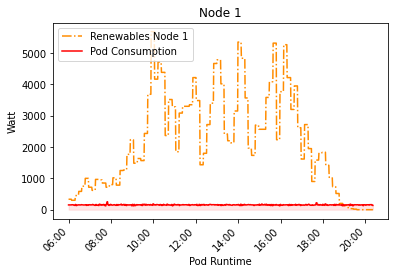

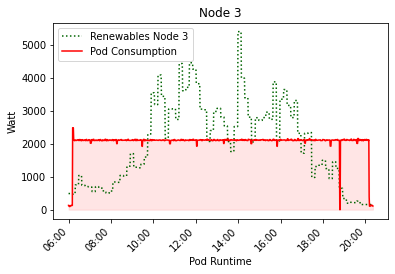

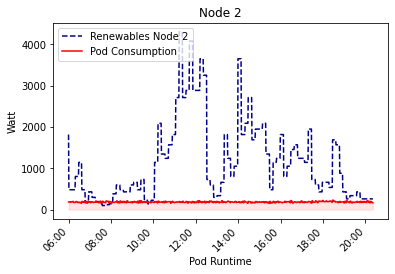

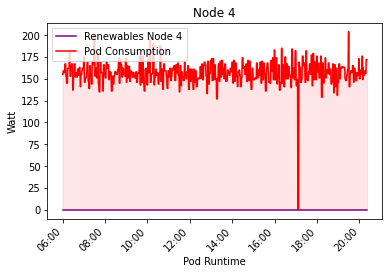

In [84]:
# 5.4
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# d e s c h e d u l e r

interval_simulator = 60
interval_monitor = 5.8
ts_resample = 600 / (interval_simulator / interval_monitor)

df = pd.read_csv('5.4a/monitor_gks.log', delimiter = ";").fillna(0)

#print(df.head(30))

is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'
print(df.head())


y1 = df[is_134].iloc[1: , :]['production'].values
y2 = df[is_178].iloc[1: , :]['production'].values
y3 = df[is_41].iloc[1: , :]['production'].values
y4 = df[is_201].iloc[1: , :]['production'].values

placed = df[is_134].iloc[1: , :]
placed = placed.reset_index(drop=True)


placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")
placed['ts_resample'] = pd.to_datetime("2020-09-22 06:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')


x = placed['ts_resample'].values
con = placed['consumption'].values

coverage_n1 = y1 / con *100
coverage_n2 = y2 / con *100
coverage_n3 = y3 / con *100
coverage_n4 = y4 / con *100

coverage_n1[coverage_n1 > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100
coverage_n4[coverage_n4 > 100] = 100    


fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
#plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
#plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
#plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 1")
plt.show()

placed = df[is_41].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

#plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
#plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
#plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 3")
plt.show()

placed = df[is_178].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

#plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
#plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
#plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 2")
plt.show()


placed = df[is_201].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

#plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
#plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
#plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 4")
plt.show()


                ts_now         ts_simulator                           node  \
0  2021-12-21 21:51:47  2020-07-15 05:50:00  ip-172-20-45-201.ec2.internal   
1  2021-12-21 21:51:47  2020-07-15 05:50:00   ip-172-20-49-41.ec2.internal   
2  2021-12-21 21:51:47  2020-07-15 05:50:00  ip-172-20-58-134.ec2.internal   
3  2021-12-21 21:51:47  2020-10-14 20:00:00  ip-172-20-61-178.ec2.internal   
4  2021-12-21 21:51:53  2020-07-15 05:50:00  ip-172-20-45-201.ec2.internal   

   consumption  production  
0          167         0.0  
1          140       489.7  
2          138       333.6  
3          164       383.0  
4          161         0.0  


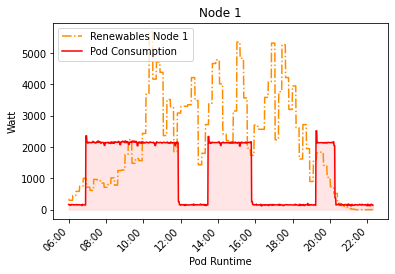

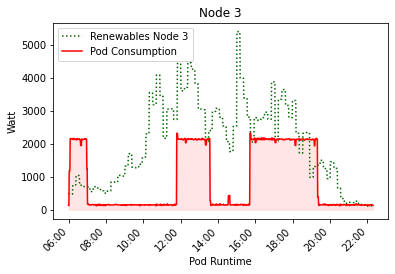

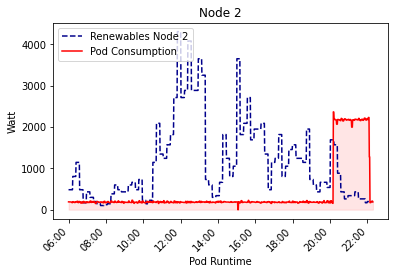

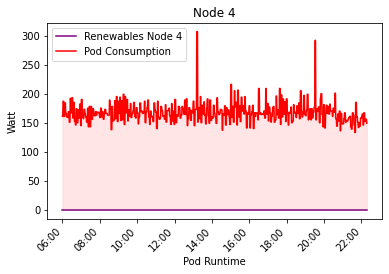

In [44]:
# 5.4
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# d e s c h e d u l e r

interval_simulator = 60
interval_monitor = 6.3
ts_resample = 600 / (interval_simulator / interval_monitor)

df = pd.read_csv('5.4a/monitor.log', delimiter = ";").fillna(0)

#print(df.head(30))

is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'
print(df.head())


y1 = df[is_134].iloc[1: , :]['production'].values
y2 = df[is_178].iloc[1: , :]['production'].values
y3 = df[is_41].iloc[1: , :]['production'].values
y4 = df[is_201].iloc[1: , :]['production'].values

placed = df[is_134].iloc[1: , :]
placed = placed.reset_index(drop=True)


placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")
placed['ts_resample'] = pd.to_datetime("2020-09-22 06:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')


x = placed['ts_resample'].values
con = placed['consumption'].values

coverage_n1 = y1 / con *100
coverage_n2 = y2 / con *100
coverage_n3 = y3 / con *100
coverage_n4 = y4 / con *100

coverage_n1[coverage_n1 > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100
coverage_n4[coverage_n4 > 100] = 100    


fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
#plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
#plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
#plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 1")
plt.show()

placed = df[is_41].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

#plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
#plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
#plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 3")
plt.show()

placed = df[is_178].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

#plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
#plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
#plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 2")
plt.show()


placed = df[is_201].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

#plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
#plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
#plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 4")
plt.show()

[0.1348847831545717, 0.15868798018184907, 0.1866917413904107, 0.21963734281224784, 0.2583968738967622, 0.303996322231485, 0.3576427320370411, 0.42075615533769545, 0.49500724157375936, 0.582361460675011, 0.6851311302058953, 0.8060366237716416, 0.9482783809078137, 1.1156216245974278, 1.3124960289381504, 1.5441129752213536, 1.8166035002604162, 2.137180588541666, 2.5143301041666657, 2.958035416666666, 3.4800416666666654, 4.094166666666665, 4.8166666666666655, 5.666666666666666, 6.666666666666666]


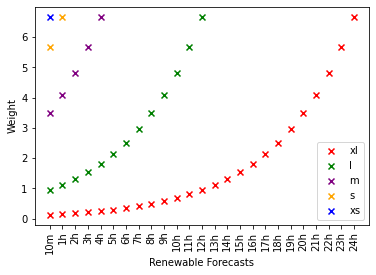

In [4]:
weights = []
e = 0.85

for i in range(25):
    x = (e**i)/(1-e)
    weights.append(x)

weights.sort()

print(weights)

y2 = weights[12:]
y3 = weights[20:]
y4 = weights[23:]
y5 = weights[24:]
y = weights
x = ["10m", "1h","2h", "3h", "4h", "5h", "6h", "7h", "8h", "9h", "10h", "11h", "12h", "13h" , "14h", "15h", "16h", "17h", "18h", "19h", "20h", "21h", "22h", "23h", "24h"]
x2 = ["10m", "1h","2h", "3h", "4h", "5h", "6h", "7h", "8h", "9h", "10h", "11h", "12h"]
x3 = ["10m", "1h","2h", "3h", "4h"]
x4 = ["10m", "1h"]
x5 = ["10m"]

plt.scatter(x,y,marker='x', color="red", label="xl")
plt.scatter(x2,y2,marker='x', color="green", label="l")
plt.scatter(x3,y3,marker='x', color="purple", label="m")
plt.scatter(x4,y4,marker='x', color="orange", label="s")
plt.scatter(x5,y5,marker='x', color="blue", label="xs")
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.xlabel("Renewable Forecasts")
plt.ylabel("Weight")
plt.show()